In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import mean_squared_error

# Q.1 Linear Regression — Predicting House Prices

<h2>1.1 Pre-Processing the Data</h2>

In [143]:
df = pd.read_csv('train.csv')
df_train = df.iloc[:1168 , :]
df_test = df.iloc[1168:,:]
x = df_train['OverallQual'].values
y = df_train['SalePrice'].values

In [144]:
print(df_train['OverallQual'].isnull().sum())
print(df_train['SalePrice'].isnull().sum())

0
0


Hence, the are NO MISSING VALUES in our required dataset

<h2>1.2 Training Linear Regression from Scratch</h2>

In [146]:
def train_linear_regression(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    numerator = np.sum((x-x_mean)*(y-y_mean))
    denominator = np.sum((x-x_mean)**2)
    m=numerator/denominator
    c = y_mean - m*x_mean
    return m,c

weight,bias = train_linear_regression(x,y)
print(f"weight : {weight} and bias : {bias}")

weight : 45411.99877915917 and bias : -96469.57131873994


<h2>1.3 Testing the Trained LR Model</h2>

In [194]:
x_test = df_test['OverallQual'].values
y_test = df_test['SalePrice'].values
n=len(x_test)
y_predictions = [weight*xi+bias for xi in x_test]
mse_predictions = sum((y_predictions[i] - y_test[i])**2 for i in range(n))/n
print(f"The mean square error for the custom model is : {mse_predictions}")

The mean square error for the custom model is : 2630182608.94864


<h2>1.4 Training and testing Sklearn’s Linear Regression Model</h2>

In [154]:
from sklearn.linear_model import LinearRegression

In [195]:
x_reshape = x.reshape(-1,1)
y_reshape = y.reshape(-1,1)
x_test_reshape = x_test.reshape(-1,1)
y_test_reshape = y_test.reshape(-1,1)
model = LinearRegression()
model.fit(x_reshape , y_reshape)

LinearRegression()

In [196]:
y_pred = model.predict(x_test_reshape)
mse = mean_squared_error(y_test_reshape , y_pred)
print(f"The mean square error for the Sklearn's model is : {mse}")

The mean square error for the Sklearn's model is : 2630182608.9486394


<h2>1.5 Creating the Required Plots</h2>

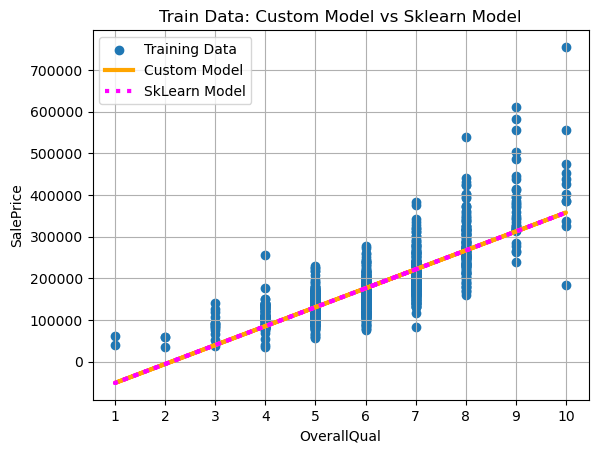

In [185]:
plt.scatter(x,y, label='Training Data')
plt.plot(x,weight*x+bias , color = 'Orange' , linewidth = 3, label = 'Custom Model')
plt.plot(x, model.predict(x_reshape), color = 'Magenta' , linewidth =3 ,linestyle = 'dotted' ,label='SkLearn Model')
plt.title('Train Data: Custom Model vs Sklearn Model')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.legend()
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.grid(True)
plt.show()

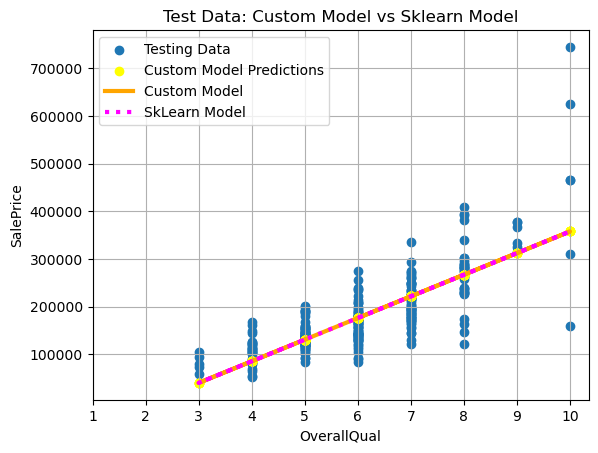

In [193]:
plt.scatter(x_test,y_test, label='Testing Data')
plt.scatter(x_test, y_predictions, color ='yellow', label = 'Custom Model Predictions')
plt.plot(x_test,weight*x_test+bias , color = 'Orange' , linewidth = 3, label = 'Custom Model')
plt.plot(x_test, model.predict(x_test_reshape), color = 'Magenta' , linewidth =3 ,linestyle = 'dotted' ,label='SkLearn Model')
plt.title('Test Data: Custom Model vs Sklearn Model')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.legend()
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.grid(True)
plt.show()

# Question 2 : Logistic Regression — Predicting Student Pass/Fail Outcome

In [199]:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [203]:
df['PassedMath'] = (df['math score']>= 50).astype(int)

In [205]:
df_train = df.iloc[:800 , :]
df_test = df.iloc[200:,:]

In [206]:
x = df_test['reading score'].values
y = df_test['PassedMath'].values

In [207]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [210]:
def train_logistic_regression(x, y, lr=0.001, epochs=10000):
    m = x.shape[0]
    x_b = np.c_[np.ones((m, 1)), x]
    theta = np.zeros(x_b.shape[1])  

    for _ in range(epochs):
        z = np.dot(x_b, theta)
        predictions = sigmoid(z)
        gradient = np.dot(x_b.T, (predictions - y)) / m
        theta -= lr * gradient
    
    return theta

theta_custom = train_logistic_regression(x, y)

In [215]:
def predict(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    probs = sigmoid(np.dot(X_b, theta))
    return (probs >= 0.5).astype(int), probs

y_pred_custom, probs_custom = predict(x, theta_custom)

Custom Logistic Regression Accuracy: 0.87


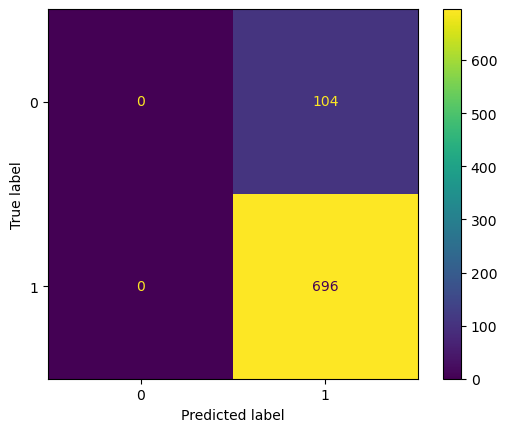

In [216]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Accuracy
accuracy_custom = accuracy_score(y, y_pred_custom)
print("Custom Logistic Regression Accuracy:", accuracy_custom)

# Confusion Matrix
cm_custom = confusion_matrix(y, y_pred_custom)
ConfusionMatrixDisplay(cm_custom).plot()

In [220]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x.reshape(-1,1),y.reshape(-1,1))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Sklearn Logistic Regression Accuracy: 0.8925


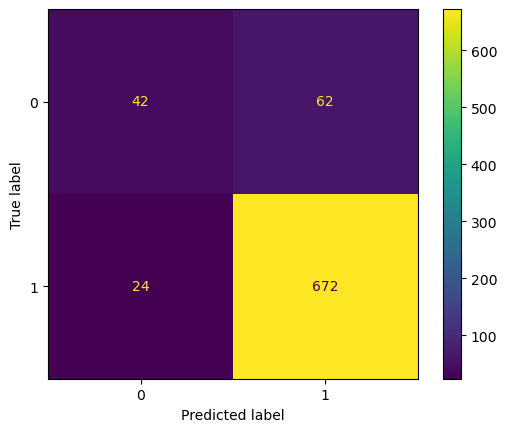

In [226]:
y_pred_sklearn = clf.predict(x.reshape(-1,1))
accuracy_sklearn = accuracy_score(y, y_pred_sklearn)

print("Sklearn Logistic Regression Accuracy:", accuracy_sklearn)

# Confusion Matrix
cm_sklearn = confusion_matrix(y, y_pred_sklearn)
ConfusionMatrixDisplay(cm_sklearn).plot()


In [233]:

# Sort training data for smoother plot
sorted_indices = x[:, 0].argsort()
X_train_sorted = x[sorted_indices]
y_train_sorted = y[sorted_indices]

# Custom model
_, probs_train_custom = predict(X_train_sorted, theta_custom)

# Sklearn model
probs_train_sklearn = clf.predict_proba(X_train_sorted)[:, 1]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_train_sorted, y_train_sorted, label='True Labels', alpha=0.5)
plt.plot(X_train_sorted, probs_train_custom, label='Custom Model', color='red')
plt.plot(X_train_sorted, probs_train_sklearn, label='Sklearn Model', color='green')
plt.title('Train Data: Custom vs Sklearn Logistic Regression')
plt.xlabel('Reading Score')
plt.ylabel('Probability of Passing Math')
plt.legend()
plt.grid(True)
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed